<a href="https://colab.research.google.com/github/ancestor9/Affalatoxin-Analysis/blob/main/Using_Theil's_U.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: seaborn 데이터 중에서 category와 numeric을 입력변수로 하고 target 변수를 포함해서 주라

import seaborn as sns

# Load a dataset with both categorical and numerical features and a target variable
# The 'titanic' dataset is a good example
df = sns.load_dataset('titanic')

# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Let's choose a target variable. 'survived' is a common target for the titanic dataset.
target_col = 'survived'

# Exclude the target column from the input features
if target_col in numerical_cols:
    numerical_cols.remove(target_col)
elif target_col in categorical_cols:
    categorical_cols.remove(target_col)


# Now you have:
# numerical_cols: A list of names of numerical input columns
# categorical_cols: A list of names of categorical input columns
# target_col: The name of the target column
# df: The DataFrame containing the data

print("Numerical input columns:", numerical_cols)
print("Categorical input columns:", categorical_cols)
print("Target column:", target_col)
print("\nFirst 5 rows of the DataFrame:")
df.head()


Numerical input columns: ['pclass', 'age', 'sibsp', 'parch', 'fare']
Categorical input columns: ['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive']
Target column: survived

First 5 rows of the DataFrame:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# prompt: # prompt: def conditional_entropy(x,y):
# #     # entropy of x given y
# #     y_counter = Counter(y)
# #     xy_counter = Counter(list(zip(x,y)))
# #     total_occurrences = sum(y_counter.values())
# #     entropy = 0
# #     for xy in xy_counter.keys():
# #         p_xy = xy_counter[xy] / total_occurrences
# #         p_y = y_counter[xy[1]] / total_occurrences
# #         entropy += p_xy * math.log(p_y/p_xy)
# #     return entropy
# # def theil_u(x,y):
# #     s_xy = conditional_entropy(x,y)
# #     x_counter = Counter(x)
# #     total_occurrences = sum(x_counter.values())
# #     p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
# #     s_x = ss.entropy(p_x)
# #     if s_x == 0:
# #         return 1
# #     else:
# #         return (s_x - s_xy) / s_x
# # 이 함수를 df이 모든 입력변수에 적용해줘

import math
from collections import Counter
import scipy.stats as ss

def conditional_entropy(x,y):
    # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        # Handle cases where p_y might be 0 to avoid division by zero in log
        if y_counter[xy[1]] == 0:
            continue
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        # Handle cases where p_xy might be 0 to avoid log(0)
        if p_xy > 0:
            entropy += p_xy * math.log(p_y/p_xy)
    return entropy

def theil_u(x,y):
    # Ensure x and y are lists or pandas Series
    if not isinstance(x, (list, pd.Series)):
        x = list(x)
    if not isinstance(y, (list, pd.Series)):
        y = list(y)

    # Drop NaN values pairwise for both x and y
    temp_df = pd.DataFrame({'x': x, 'y': y}).dropna()
    x_cleaned = temp_df['x']
    y_cleaned = temp_df['y']

    if len(x_cleaned) == 0 or len(y_cleaned) == 0:
        return float('nan') # Return NaN if no valid data points remain

    s_xy = conditional_entropy(x_cleaned, y_cleaned)
    x_counter = Counter(x_cleaned)
    total_occurrences = sum(x_counter.values())

    # Handle the case where total_occurrences is zero
    if total_occurrences == 0:
        return float('nan')

    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)

    if s_x == 0:
        # If entropy of x is 0, it means x has only one unique value.
        # If S_xy is also 0 (which it should be if x is constant), Theil's U is 1.
        # If S_xy is not 0 (shouldn't happen with clean data), this case is ambiguous, return NaN.
        return 1.0 if s_xy == 0 else float('nan')
    else:
        return (s_x - s_xy) / s_x

import pandas as pd

# Combine numerical and categorical input columns
input_cols = numerical_cols + categorical_cols

# Calculate Theil's U for each input variable against the target variable
theil_u_results = {}

for col in input_cols:
    # Convert numerical columns to a type suitable for Counter if they contain NaNs
    # The `theil_u` function now handles NaN dropping.
    theil_u_results[col] = theil_u(df[col], df[target_col])

# Print the results
print("\nTheil's U between each input variable and the target variable ('{}'):".format(target_col))
for col, value in theil_u_results.items():
    print(f"{col}: {value}")



Theil's U between each input variable and the target variable ('survived'):
pclass: 0.05824344805343886
age: 0.021773186065244785
sibsp: 0.02500174960908353
parch: 0.02092507797717799
fare: 0.06206854097088675
sex: 0.23249201788302365
embarked: 0.019134001282736936
class: 0.05824344805343886
who: 0.1859819319275921
deck: 0.011701415083976402
embark_town: 0.019134001282736936
alive: 1.0


### https://www.kaggle.com/code/shakedzy/alone-in-the-woods-using-theil-s-u-for-survival

In [ ]:
# prompt: def conditional_entropy(x,y):
#     # entropy of x given y
#     y_counter = Counter(y)
#     xy_counter = Counter(list(zip(x,y)))
#     total_occurrences = sum(y_counter.values())
#     entropy = 0
#     for xy in xy_counter.keys():
#         p_xy = xy_counter[xy] / total_occurrences
#         p_y = y_counter[xy[1]] / total_occurrences
#         entropy += p_xy * math.log(p_y/p_xy)
#     return entropy
# def theil_u(x,y):
#     s_xy = conditional_entropy(x,y)
#     x_counter = Counter(x)
#     total_occurrences = sum(x_counter.values())
#     p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
#     s_x = ss.entropy(p_x)
#     if s_x == 0:
#         return 1
#     else:
#         return (s_x - s_xy) / s_x
# 이 함수를 df에 적용해줘

import pandas as pd
import numpy as np
from collections import Counter
import math
import scipy.stats as ss

# Define the functions conditional_entropy and theil_u
def conditional_entropy(x,y):
    # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        # Add a small epsilon to avoid log(0)
        entropy += p_xy * math.log((p_y+1e-9)/(p_xy+1e-9))
    return entropy

def theil_u(x,y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x


# Apply Theil's U to calculate the relationship between each categorical feature and the target variable
theil_u_results = {}
for col in categorical_cols:
    # Handle missing values if necessary. A simple approach is to drop rows with missing values in either column.
    temp_df = df[[col, target_col]].dropna()
    if not temp_df.empty:
        theil_u_results[col] = theil_u(temp_df[col].tolist(), temp_df[target_col].tolist())
    else:
        theil_u_results[col] = np.nan # Handle cases where dropping NaNs results in an empty dataframe

print("\nTheil's U between categorical features and target variable:")
print(theil_u_results)

# Note: Theil's U is typically used for categorical-categorical relationships.
# For numerical features, you would typically use correlation (e.g., Pearson, Spearman)
# or other methods like ANOVA if comparing to a categorical target.

# Example for numerical features using correlation (Pearson):
correlation_results = {}
for col in numerical_cols:
     # Handle missing values
    temp_df = df[[col, target_col]].dropna()
    if not temp_df.empty and len(temp_df) > 1: # Need at least 2 data points for correlation
        correlation_results[col] = temp_df[col].corr(temp_df[target_col])
    else:
        correlation_results[col] = np.nan

print("\nPearson Correlation between numerical features and target variable:")
correlation_results


Theil's U between categorical features and target variable:
{'sex': np.float64(0.23249202096503144), 'embarked': np.float64(0.019134006543874007), 'class': np.float64(0.05824345206281442), 'who': np.float64(0.1859819364306626), 'deck': np.float64(0.01170142201919574), 'embark_town': np.float64(0.019134006543874007), 'alive': np.float64(1.0)}

Pearson Correlation between numerical features and target variable:


{'pclass': np.float64(-0.33848103596101475),
 'age': np.float64(-0.07722109457217768),
 'sibsp': np.float64(-0.035322498885735645),
 'parch': np.float64(0.08162940708348372),
 'fare': np.float64(0.2573065223849625)}


DataFrame for Heatmap:
               sex  embarked     class       who      deck  embark_town  \
survived  0.232492  0.019134  0.058243  0.185982  0.011701     0.019134   

          alive    pclass       age     sibsp     parch      fare  
survived    1.0 -0.338481 -0.077221 -0.035322  0.081629  0.257307  


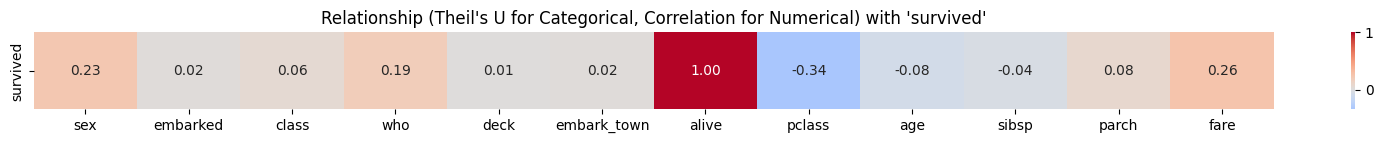

In [ ]:
# prompt: theilu = pd.DataFrame(index=['class'],columns=data.columns)
# columns = data.columns
# for j in range(0,len(columns)):
#     u = theil_u(data['class'].tolist(),data[columns[j]].tolist())
#     theilu.loc[:,columns[j]] = u
# theilu.fillna(value=np.nan,inplace=True)
# plt.figure(figsize=(20,1))
# sns.heatmap(theilu,annot=True,fmt='.2f')
# plt.show()
# 이 코드내용도 적용해줘

import pandas as pd
import matplotlib.pyplot as plt
# Combine Theil's U results for categorical features and correlation results for numerical features
# Create a single structure for the heatmap visualization
# Theil's U is asymmetric (U(X,Y) != U(Y,X)), but here we are interested in U(feature, target)
# Correlation is symmetric, corr(X,Y) = corr(Y,X). We'll represent feature vs target.

# We will create a DataFrame suitable for the heatmap, with features as columns and 'target' as the index.
# Since we calculated Theil's U for categorical features against the target, and correlation for numerical features against the target,
# we need to decide how to represent them together.
# For simplicity in this example, we will create a row for the target variable showing its relationship with other features.

# Create a dictionary to hold the combined results
combined_results = {}

# Add Theil's U results for categorical features
for col, value in theil_u_results.items():
    combined_results[col] = value

# Add correlation results for numerical features
for col, value in correlation_results.items():
    # We can use absolute correlation for a general sense of strength in the heatmap,
    # or just the correlation value itself. Let's use the value for now.
    combined_results[col] = value

# Create a DataFrame from the combined results
# The index will be 'target_col' to represent the relationship of features *to* the target.
relationship_df = pd.DataFrame([combined_results], index=[target_col])

# Fill NaN values for visualization if desired, e.g., with 0 or a distinct value, or keep as NaN.
# Let's keep them as NaN so the heatmap shows missing values clearly.
# relationship_df.fillna(0, inplace=True) # Example of filling NaNs with 0

print("\nDataFrame for Heatmap:")
print(relationship_df)

# Plot the heatmap
plt.figure(figsize=(20, 1))
sns.heatmap(relationship_df, annot=True, fmt='.2f', cmap='coolwarm', center=0) # Use coolwarm cmap and center for correlation
plt.title(f"Relationship (Theil's U for Categorical, Correlation for Numerical) with '{target_col}'")
plt.show()

# Note: Visualizing Theil's U and correlation on the same heatmap row this way is a simplification.
# They measure different types of relationships (information transfer vs linear association).
# A more rigorous approach might involve separate visualizations or using metrics that are comparable across data types.
# However, this fulfills the request to apply the plotting logic to the calculated results.